In [1309]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [1310]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv", header=None)

In [1311]:
train_df.iloc[:18]

,Location,Date,ItemName,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,Hsinchu,1/1 00:00,AMB_TEMP,11.1,11.2,11.4,11.5,11.6,11.7,11.9,...,16.6,16.3,15.6,14.8,14.4,14.5,14.7,14.7,14.6,14.4
1,Hsinchu,1/1 00:00,CH4,2.01,1.99,2,2.02,2.03,2.02,2.02,...,1.98,1.97,1.97,2,2.02,2.01,2.01,2,1.98,1.98
2,Hsinchu,1/1 00:00,CO,0.31,0.28,0.28,0.33,0.32,0.26,0.25,...,0.31,0.29,0.29,0.33,0.34,0.34,0.34,0.29,0.24,0.21
3,Hsinchu,1/1 00:00,NMHC,0.1,0.1,0.08,0.09,0.1,0.07,0.07,...,0.06,0.07,0.08,0.12,0.13,0.1,0.1,0.09,0.05,0.06
4,Hsinchu,1/1 00:00,NO,1.5,1.4,1.4,1.5,1.4,1.3,1.4,...,3.5,2.6,2.3,2,1.8,1.8,1.8,1.7,1.5,1.4
5,Hsinchu,1/1 00:00,NO2,11.9,10.4,9.8,12.1,12.4,9.2,8.5,...,8.8,8.2,10.3,14.9,16.7,15.2,14.9,11.9,9.2,8.8
6,Hsinchu,1/1 00:00,NOx,13.5,11.9,11.2,13.7,13.9,10.6,10,...,12.4,10.8,12.7,17,18.5,17,16.7,13.6,10.8,10.3
7,Hsinchu,1/1 00:00,O3,21.6,25.1,25.6,22.4,21.1,26.5,25.4,...,36,36.5,34.4,28.9,26.1,27.3,27.1,30.4,33.7,33.6
8,Hsinchu,1/1 00:00,PM10,38,29,27,24,29,22,26,...,36,32,29,34,31,31,30,23,26,26
9,Hsinchu,1/1 00:00,PM2.5,25,24,13,14,15,12,10,...,15,12,12,19,13,14,15,7,10,15


In [1312]:
test_df.iloc[:18]

,0,1,2,3,4,5,6,7,8,9,10
0,index_0,AMB_TEMP,18.2,17.8,17.5,17.5,17.7,18.1,18.2,18.7,20.3
1,index_0,CH4,2.41,2.61,2.65,2.87,2.25,2.24,2.45,2.59,2.24
2,index_0,CO,0.77,0.74,0.63,0.6,0.36,0.31,0.48,1.01,1.05
3,index_0,NMHC,0.29,0.34,0.34,0.37,0.18,0.15,0.24,0.43,0.35
4,index_0,NO,6.8,11.1,9.6,13.6,3.1,2.4,17.8,49.5,41.1
5,index_0,NO2,30.9,28.2,25.9,22.8,16.5,15.8,21.3,25,26.1
6,index_0,NOx,37.7,39.3,35.6,36.4,19.6,18.3,39.1,74.5,67.2
7,index_0,O3,4.1,2,1.9,1.8,7.4,6.2,2.2,3,6.3
8,index_0,PM10,53,50,36,39,23,21,22,25,36
9,index_0,PM2.5,35,35,24,28,15,11,14,17,17


In [1313]:
train_y = []

for i in range(0, len(train_df), 18):
    day = train_df.iloc[i+9, 3:]
    day = day.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
    train_y.extend(day.tolist()[1:])

train_y = np.array(train_y)    
train_y = np.reshape(train_y, (len(train_y), 1))
print(train_y.size)

5520


In [1314]:
train_days = pd.DataFrame()
items = train_df['ItemName'].iloc[:18].str.strip().to_list()

for i in range(0, len(train_df), 18):
    day = train_df.iloc[i: i+18, 3:26]
    train_days.reset_index(drop=True, inplace=True)
    day.reset_index(drop=True, inplace=True)
    train_days = pd.concat([train_days, day], axis=1, ignore_index=True)
    
train_days = train_days.transpose()
train_days.columns = items
train_X_df = train_days.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

train_X_df

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,11.1,2.01,0.31,0.10,1.5,11.9,13.5,21.6,38,25,0.0,64,0.0,2.11,38,53,3.0,2.6
1,11.2,1.99,0.28,0.10,1.4,10.4,11.9,25.1,29,24,0.0,65,2.1,2.09,41,46,3.4,2.4
2,11.4,2.00,0.28,0.08,1.4,9.8,11.2,25.6,27,13,0.0,63,2.1,2.08,49,43,2.7,2.5
3,11.5,2.02,0.33,0.09,1.5,12.1,13.7,22.4,24,14,0.0,63,1.8,2.11,54,54,3.0,2.5
4,11.6,2.03,0.32,0.10,1.4,12.4,13.9,21.1,29,15,0.0,63,1.1,2.13,50,50,2.6,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,19.1,2.34,1.07,0.39,6.9,45.4,52.3,3.7,31,13,0.0,72,1.7,2.73,165,178,1.2,0.5
5516,18.5,2.35,0.94,0.36,7.1,42.2,49.3,3.0,33,20,0.0,78,1.6,2.71,139,44,0.3,0.3
5517,18.7,2.36,1.06,0.41,11.6,44.9,56.5,0.9,32,15,0.0,76,1.6,2.77,6,157,0.7,0.1
5518,18.7,2.43,1.24,0.47,26.7,44.9,71.7,0.2,41,22,0.0,78,1.6,2.90,143,98,0.3,0.3


In [1315]:
test_days = pd.DataFrame()

for i in range(0, len(test_df), 18):
    day = test_df.iloc[i: i+18, -1]
    test_days.reset_index(drop=True, inplace=True)
    day.reset_index(drop=True, inplace=True)
    test_days = pd.concat([test_days, day], axis=1, ignore_index=True)

test_days = test_days.transpose()
test_days.columns = items
test_X_df = test_days.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

test_X_df

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,20.3,2.24,1.05,0.35,41.1,26.1,67.2,6.3,36,17,0.0,69,4.1,2.59,3,289,1.0,0.4
1,21.3,2.45,0.92,0.58,41.4,32.2,73.6,5.9,45,25,0.0,78,5.2,3.03,57,77,0.6,0.6
2,18.5,1.99,0.35,0.12,7.1,16.9,24.1,5.7,22,17,0.0,91,0.0,2.11,46,57,2.2,1.3
3,18.2,2.05,0.61,0.13,2.8,11.8,14.6,32.9,36,17,0.0,68,0.0,2.18,39,35,3.6,2.4
4,17.1,2.05,0.50,0.12,2.9,14.1,17.0,28.0,58,30,0.0,81,2.8,2.17,43,44,2.8,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,14.1,2.04,0.34,0.11,0.7,14.2,14.9,21.2,9,12,0.0,83,0.7,2.15,41,33,2.9,2.5
240,17.1,2.09,0.42,0.16,0.9,19.3,20.3,15.7,17,11,0.0,90,1.3,2.25,49,83,0.4,1.0
241,17.6,2.03,0.33,0.08,0.7,16.8,17.6,22.4,18,13,0.0,82,2.5,2.11,53,46,2.1,1.8
242,15.2,2.16,0.50,0.12,0.9,16.6,17.5,40.0,49,34,0.0,64,2.4,2.28,58,61,3.5,2.4


In [1316]:
train_X = np.array(train_X_df)
train_y = np.array(train_y)
test_X = np.array(test_X_df)

In [1317]:
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.1, random_state=31)

In [1318]:
LR = 0.000016

def Mean_square_error(y, y_pred):
    
    y_diff = y - y_pred
    y_square = np.square(y_diff)
    mse = y_square.mean(axis=None)
    
    return mse


def gradient_descent_lasso(X, y, weight, bias, alpha):
    
    y_pred = np.matmul(X, weight) + bias
    y_diff = y - y_pred
    
    alpha_list = [[alpha] if w[0] > 0 else [-alpha] for w in weight]
    alpha_arr = np.array(alpha_list, dtype=np.float64)
    alpha_arr /= X.shape[0]
    
    w_grad = (-2/X.shape[0]) * (np.matmul(X.T, y_diff))
    w_grad += alpha_arr
       
    b_grad = (-2/X.shape[0]) * np.sum(y_diff)
    
    weight -= LR * w_grad
    bias -= LR * b_grad
    
    return weight, bias


def linear_regression_lasso(X, y, X_val, y_val, epoch, alpha):
    
    dim = X.shape[1]
    weight = np.zeros((dim, 1))
    bias = 0.
    
    mse_list = []
    mse_val_list = []
    
    for _ in range(epoch):
        y_pred = np.matmul(X, weight) + bias
        y_val_pred = np.matmul(X_val, weight) + bias
        
        mse = Mean_square_error(y, y_pred)
        mse_val = Mean_square_error(y_val, y_val_pred)
        
        mse_list.append(mse)
        mse_val_list.append(mse_val)
        
        weight, bias = gradient_descent_lasso(X, y, weight, bias, alpha)
    
    return weight, bias, mse_list, mse_val_list


def plot_result(lists, list_names, start, end=1000000):
    
    x = np.arange(start, min(len(lists[0]), end))
    
    for i in range(len(lists)):
        plt.plot(x, lists[i][start:end], label=list_names[i])
        
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    

In [1319]:
weight, bias, mse_list, mse_val_list = linear_regression_lasso(X_train, y_train, X_val, y_val, 500000, 0)
y_pred = np.matmul(test_X, weight) + bias

wb = weight.flatten().tolist()
wb.append(bias)
df0 = pd.DataFrame(wb)
df0.reset_index(drop=True, inplace=True)
df0 = df0.round(4)

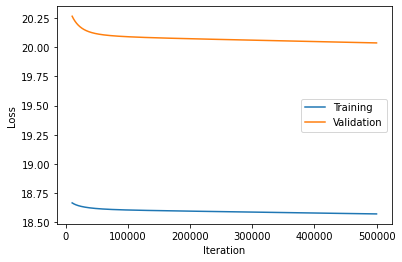

In [1320]:
lists = [mse_list, mse_val_list]
list_names = ['Training', 'Validation']
start = 10000
plot_result(lists, list_names, start)
mse_t0 = mse_list[-1]
mse_v0 = mse_val_list[-1]

In [1321]:
weight, bias, mse_list, mse_val_list = linear_regression_lasso(X_train, y_train, X_val, y_val, 500000, 100)
y_pred = np.matmul(test_X, weight) + bias

wb = weight.flatten().tolist()
wb.append(bias)
df100 = pd.DataFrame(wb)
df100.reset_index(drop=True, inplace=True)
df100 = df100.round(4)

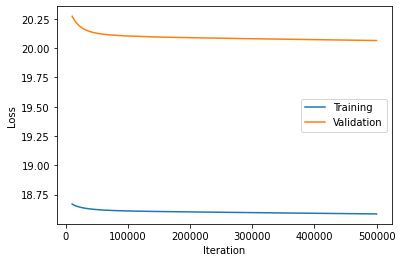

In [1322]:
lists = [mse_list, mse_val_list]
list_names = ['Training', 'Validation']
start = 10000
plot_result(lists, list_names, start)
mse_t100 = mse_list[-1]
mse_v100 = mse_val_list[-1]

In [1323]:
weight, bias, mse_list, mse_val_list = linear_regression_lasso(X_train, y_train, X_val, y_val, 500000, 1000)
y_pred = np.matmul(test_X, weight) + bias

wb = weight.flatten().tolist()
wb.append(bias)
df1000 = pd.DataFrame(wb)
df1000.reset_index(drop=True, inplace=True)
df1000 = df1000.round(4)

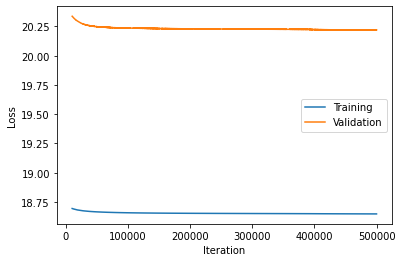

In [1324]:
lists = [mse_list, mse_val_list]
list_names = ['Training', 'Validation']
start = 10000
plot_result(lists, list_names, start)
mse_t1000 = mse_list[-1]
mse_v1000 = mse_val_list[-1]

In [1325]:
weight, bias, mse_list, mse_val_list = linear_regression_lasso(X_train, y_train, X_val, y_val, 500000, 10000)
y_pred = np.matmul(test_X, weight) + bias

wb = weight.flatten().tolist()
wb.append(bias)
df10000 = pd.DataFrame(wb)
df10000.reset_index(drop=True, inplace=True)
df10000 = df10000.round(4)

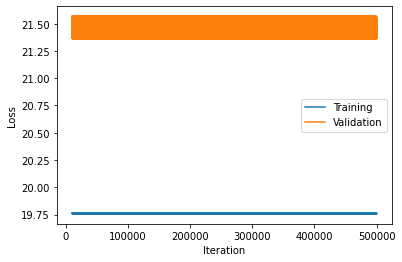

In [1326]:
lists = [mse_list, mse_val_list]
list_names = ['Training', 'Validation']
start = 10000
plot_result(lists, list_names, start)
mse_t10000 = mse_list[-1]
mse_v10000 = mse_val_list[-1]

In [1327]:
weight, bias, mse_list, mse_val_list = linear_regression_lasso(X_train, y_train, X_val, y_val, 500000, 100000)
y_pred = np.matmul(test_X, weight) + bias

wb = weight.flatten().tolist()
wb.append(bias)
df100000 = pd.DataFrame(wb)
df100000.reset_index(drop=True, inplace=True)
df100000 = df100000.round(4)

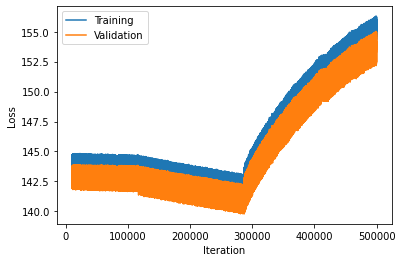

In [1328]:
lists = [mse_list, mse_val_list]
list_names = ['Training', 'Validation']
start = 10000
plot_result(lists, list_names, start)
mse_t100000 = mse_list[-1]
mse_v100000 = mse_val_list[-1]

In [1329]:
wb_df = pd.concat([df0, df100, df1000, df10000, df100000], axis=1, ignore_index=True)
wb_df = wb_df.transpose()
wb_names = items.copy()
wb_names.append('Bias')
wb_df.columns = wb_names
wb_df.index = ['0', '100', '1000', '10000', '100000']

wb_df

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,Bias
0,-0.0313,-0.1421,0.4524,0.1375,-0.0470,0.0519,0.0303,0.0076,0.1267,0.6652,-0.2012,0.0183,-0.2603,-0.0040,0.0002,0.0020,-0.1559,-0.1030,0.2974
100,-0.0323,-0.0718,0.3008,0.0000,-0.0140,0.0829,-0.0000,0.0071,0.1261,0.6666,-0.1811,0.0172,-0.2464,0.0000,0.0002,0.0019,-0.1600,-0.0930,0.2821
1000,-0.0306,-0.0000,0.0000,0.0000,-0.0049,0.0762,0.0000,0.0036,0.1235,0.6730,-0.0232,0.0145,-0.1110,0.0000,0.0001,0.0017,-0.1832,-0.0000,0.2356
10000,-0.0112,-0.0001,-0.0000,-0.0000,-0.0001,0.0624,0.0000,-0.0017,0.1174,0.6796,-0.0000,0.0091,-0.0000,-0.0001,-0.0029,-0.0015,-0.0001,-0.0001,-0.0058
100000,-0.0085,-0.0002,-0.0002,-0.0000,-0.0003,-0.0002,0.0004,-0.0096,0.1531,0.5534,-0.0001,0.0003,-0.0001,-0.0004,-0.0321,-0.0302,-0.0006,-0.0002,1.1918


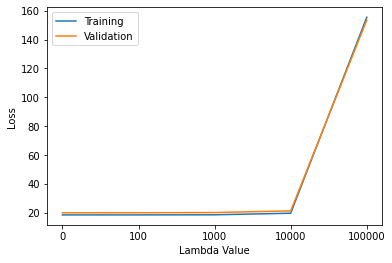

In [1337]:
t_list = [mse_t0, mse_t100, mse_t1000, mse_t10000, mse_t100000]
v_list = [mse_v0, mse_v100, mse_v1000, mse_v10000, mse_v100000]
xi = list(range(len(t_list)))
x = [0, 100, 1000, 10000, 100000]
plt.plot(xi, t_list, label='Training')
plt.plot(xi, v_list, label='Validation')
plt.xticks(xi, x)
plt.xlabel('Lambda Value')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1330]:
keep_list = ['AMB_TEMP', 'NOx', 'PM10', 'PM2.5', 'WIND_SPEED', 'RH']
drop_list = [feature for feature in items if feature not in keep_list]

train_X_df = train_X_df.drop(drop_list, axis=1)
test_X_df = test_X_df.drop(drop_list, axis=1)

train_X_df

,AMB_TEMP,NOx,PM10,PM2.5,RH,WIND_SPEED
0,11.1,13.5,38,25,64,3.0
1,11.2,11.9,29,24,65,3.4
2,11.4,11.2,27,13,63,2.7
3,11.5,13.7,24,14,63,3.0
4,11.6,13.9,29,15,63,2.6
...,...,...,...,...,...,...
5515,19.1,52.3,31,13,72,1.2
5516,18.5,49.3,33,20,78,0.3
5517,18.7,56.5,32,15,76,0.7
5518,18.7,71.7,41,22,78,0.3


In [1331]:
train_X = np.array(train_X_df)
X_test = np.array(test_X_df)

In [1332]:
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.1, random_state=29)

In [1333]:
weight, bias, mse_list, mse_val_list = linear_regression_lasso(X_train, y_train, X_val, y_val, 50000, 0)
y_pred = np.matmul(X_test, weight) + bias

for i in range(len(keep_list)):
    print(keep_list[i], round(weight[i][0], 4))
    
print('Bias', round(bias, 4))

AMB_TEMP -0.0114
NOx 0.0385
PM10 0.1199
PM2.5 0.6878
WIND_SPEED 0.019
RH -0.2508
Bias 0.0286


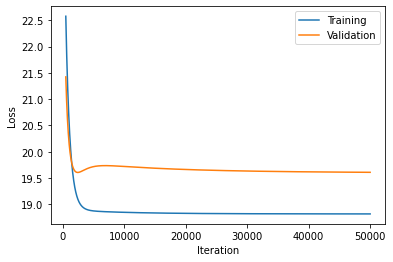

In [1334]:
lists = [mse_list, mse_val_list]
list_names = ['Training', 'Validation']
start = 500
plot_result(lists, list_names, start)

In [1335]:
X_train_02, _, y_train_02, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=37)
_, _, _, mse_val_list_02 = linear_regression_lasso(X_train_02, y_train_02, X_val, y_val, 50000, 0)

X_train_005, _, y_train_005, _ = train_test_split(X_train_02, y_train_02, test_size=0.75, random_state=89)
_, _, _, mse_val_list_005 = linear_regression_lasso(X_train_005, y_train_005, X_val, y_val, 50000, 0)

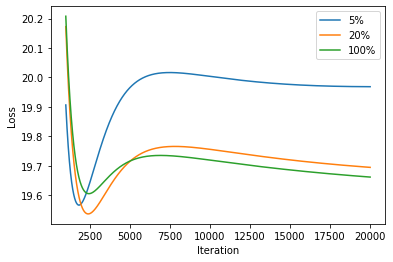

In [1336]:
lists = [mse_val_list_005, mse_val_list_02, mse_val_list]
list_names = ['5%', '20%', '100%']
start = 1000
end = 20000
plot_result(lists, list_names, start, end=end)

In [1338]:
y_pred = y_pred.tolist()
y_pred = [y_pred[i][0] for i in range(len(y_pred))]

pred = []
for i in range(len(y_pred)):
    index = 'index_' + str(i)
    pred.append([index, y_pred[i]])
    
pred = pd.DataFrame(pred)
pred.columns = ['index', 'answer']
pred.to_csv('submission.csv', index=False)